# **GRIP** 
# **The Sparks Foundation**
# Task 1:
# Prediction using Supervised ML


## **By: Suryakumar.B**

# Simple Linear Regression 

In this regression task we wil predict the percentage of marks that a student can expected to score based upon the number of hours he studied. This is a simple linear regression problem as it has only two features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df=pd.read_csv('http://bit.ly/w-data')

print('Data imported sucessfully. \n')

df.head()

Data imported sucessfully. 



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


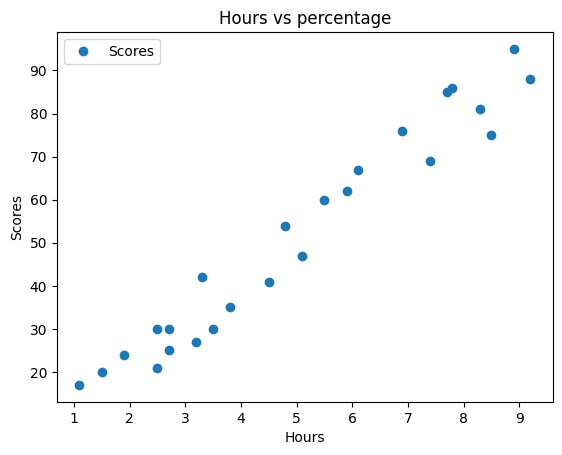

In [ ]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**From the above plot, we can clearly understand that there is a positive linear relation between the student studied hours and percentage of score.**

# Splitting the independent and dependent features

In [ ]:
x=df.drop(['Scores'],1)
y=df['Scores']

# Train test split


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=10)


In [ ]:
lr=LinearRegression().fit(xtrain,ytrain)
print(lr)
print('Training completed.')

LinearRegression()
Training completed.


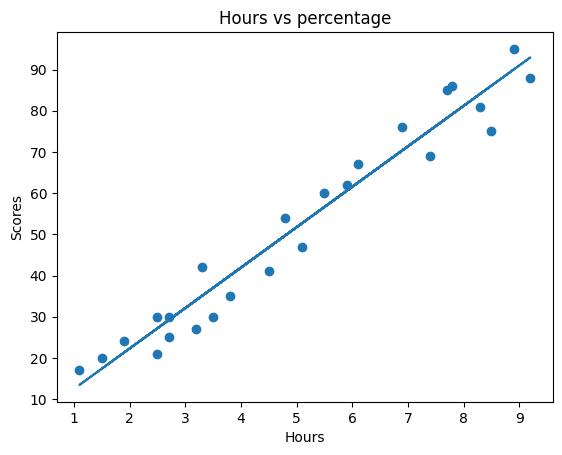

In [ ]:
line=lr.coef_ * x + lr.intercept_
plt.scatter(x=x,y=y)
plt.plot(x,line)
plt.title('Hours vs percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
ypred_train=lr.predict(xtrain)
ypred_test=lr.predict(xtest)

In [ ]:
print('Predicted training values: \n',ypred_train)
print('Predicted testing values: \n',ypred_test)

Predicted training values: 
 [75.27582547 13.44570118 56.62864513 60.5543673  39.94432587 86.07156145
 70.36867275 92.94157527 62.51722839 78.2201171  49.75863132 79.20154764
 84.10870037 29.14858989 27.1857288  21.29714553 27.1857288  89.99728363
 37.00003424 29.14858989]
Predicted testing values: 
 [17.37142335 52.70292295 35.03717315 34.05574261 46.81433968]


In [ ]:
df1=pd.DataFrame({'Actual':ytrain,'predicted':ypred_train})
df2 = pd.DataFrame({'Actual':ytest,'Predicted':ypred_test})

In [ ]:
df1

,Actual,predicted
19,69,75.275825
14,17,13.445701
7,60,56.628645
11,62,60.554367
22,35,39.944326
3,75,86.071561
23,76,70.368673
6,88,92.941575
18,67,62.517228
10,85,78.220117


In [ ]:
df2

,Actual,Predicted
5,20,17.371423
1,47,52.702923
13,42,35.037173
2,27,34.055743
12,41,46.814340


In [ ]:
print('RMSE TRAIN',np.sqrt(metrics.mean_squared_error(ytrain,ypred_train)))
print('RMSE TEST',np.sqrt(metrics.mean_squared_error(ytest,ypred_test)))

RMSE TRAIN 5.26316503796243
RMSE TEST 5.856684262506166


In [ ]:
print('Mean Absolute Error TRAIN',metrics.mean_absolute_error(ytrain,ypred_train))
print('Mean Absolute Error TEST',metrics.mean_absolute_error(ytest,ypred_test))

Mean Absolute Error TRAIN 4.767634134928153
Mean Absolute Error TEST 5.632881746692994


# **What will be predicted score if a student studies for 9.25 hrs/day?**

In [ ]:
input_data = (9.25)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

print(f'The student who studied {input_data} hours will got score {round(prediction[0],2)}')

The student who studied 9.25 hours will got score 93.43
